In [1]:
# random forest model

In [2]:
# imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [3]:
import os
cwd = os.getcwd()
files = os.listdir()
print("Current directory:", cwd)
print("Files:", files)

Current directory: C:\Users\shane\CT4101 Galway
Files: ['.git', '.ipynb_checkpoints', 'Assignment1', 'Assignment1.ipynb', 'wildfires_test.csv', 'wildfires_training.csv']


In [4]:
# load data
df_training = pd.read_csv("wildfires_training.csv")
df_test = pd.read_csv("wildfires_test.csv")

# independent (feature) and dependent (target) columns
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code",
                    "buildup_index", "day", "month", "wind_speed"]
dependent_col = "fire"

# shape and preview
print("Training data shape:", df_training.shape)
print("Test data shape:", df_test.shape)

print("\nTraining data head:")
print(df_training.head())

print("\nTest data head:")
print(df_test.head())

Training data shape: (154, 10)
Test data shape: (50, 10)

Training data head:
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  

Test data head:
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    33        68       4.5          9.12           5.09   19   
1  yes  2009    28        56       0.0         38.17          21.21   12   
2   no  2017    30        64       0.6         15.38           6.24   24   
3   no

In [5]:
# encode target column: yes = 1 - no = 0
df_training["fire_enc"] = df_training["fire"].map({"yes": 1, "no": 0}) #classifier processes numerically
df_test["fire_enc"] = df_test["fire"].map({"yes": 1, "no": 0})

print("Encoded training data preview:")
print(df_training.head())

# set up X ( features) and y (target) for training and test sets
X_training = df_training[independent_cols]
y_training = df_training["fire_enc"] # target column

X_test = df_test[independent_cols]
y_test = df_test["fire_enc"]

# shapes
print("\nX_training shape:", X_training.shape)
print("y_training shape:", y_training.shape)
print("\nX_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Encoded training data preview:
  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  fire_enc  
0      6          19         0  
1      6          13         0  
2      6          22         0  
3      6          15         0  
4      6          18         0  

X_training shape: (154, 9)
y_training shape: (154,)

X_test shape: (50, 9)
y_test shape: (50,)


In [6]:
# initialize RF model, random_state=1 for reproducibility
rf = RandomForestClassifier(random_state=1)
#rf = RandomForestClassifier()

# fit model on training data
rf.fit(X_training, y_training)

# make predictions on test data
y_pred = rf.predict(X_test)

# evaluate performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.88

Classification report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88        22
           1       0.96      0.82      0.88        28

    accuracy                           0.88        50
   macro avg       0.88      0.89      0.88        50
weighted avg       0.89      0.88      0.88        50



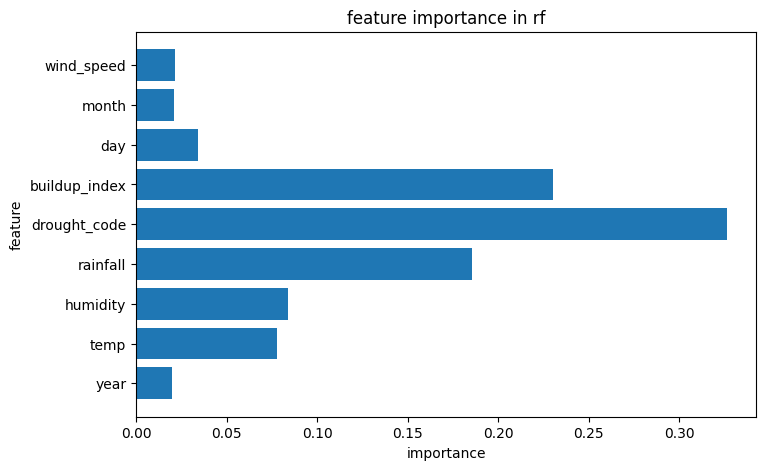

In [7]:
# keep for report?
# feature importances
importances = rf.feature_importances_

# bar plot of importances
plt.figure(figsize=(8,5))
plt.barh(independent_cols, importances)
plt.xlabel("importance")
plt.ylabel("feature")
plt.title("feature importance in rf")
plt.show()

In [8]:
# train baseline model with default hyperparameters
rf_default = RandomForestClassifier(random_state=1)
rf_default.fit(X_training, y_training)

# evaluate on training and test sets
y_pred_train = rf_default.predict(X_training)
y_pred_test  = rf_default.predict(X_test)

print("Default Random Forest Results:")
print("Training Accuracy:", accuracy_score(y_training, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Default Random Forest Results:
Training Accuracy: 1.0
Test Accuracy: 0.88


In [11]:
# try different hyperparameter values
n_estimators_list = [10, 25, 50, 75, 100, 150, 200]
max_depth_list = [None, 1, 3, 5, 10]

results = []

for n in n_estimators_list:
    for depth in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        model.fit(X_training, y_training)
        
        train_acc = accuracy_score(y_training, model.predict(X_training))
        test_acc  = accuracy_score(y_test, model.predict(X_test))
        
        # store "None" as a string for plotting clarity
        results.append((n, "None" if depth is None else depth, train_acc, test_acc))

results_df = pd.DataFrame(results, columns=["n_estimators", "max_depth", "Train Accuracy", "Test Accuracy"])

print(results_df)

    n_estimators max_depth  Train Accuracy  Test Accuracy
0             10      None        0.993506           0.82
1             10         1        0.896104           0.82
2             10         3        0.948052           0.84
3             10         5        0.987013           0.84
4             10        10        0.993506           0.82
5             25      None        0.993506           0.88
6             25         1        0.909091           0.82
7             25         3        0.948052           0.82
8             25         5        0.980519           0.82
9             25        10        0.993506           0.88
10            50      None        1.000000           0.84
11            50         1        0.896104           0.84
12            50         3        0.935065           0.80
13            50         5        0.980519           0.86
14            50        10        1.000000           0.84
15            75      None        1.000000           0.84
16            

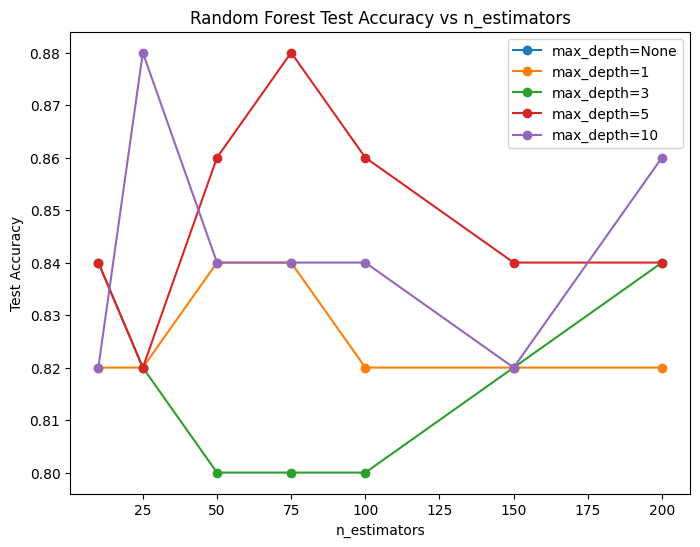

In [12]:
plt.figure(figsize=(8,6))
for depth in max_depth_list:
    subset = results_df[results_df["max_depth"] == depth]
    plt.plot(subset["n_estimators"], subset["Test Accuracy"], marker="o", label=f"max_depth={depth}")

plt.title("Random Forest Test Accuracy vs n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

In [13]:
# logistic regression model

In [14]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [15]:
# load data
df_training = pd.read_csv("wildfires_training.csv")
df_test = pd.read_csv("wildfires_test.csv")

# independent (feature) and dependent (target) columns
independent_cols = ["year", "temp", "humidity", "rainfall", "drought_code",
                    "buildup_index", "day", "month", "wind_speed"]
dependent_col = "fire"

# encode target: yes = 1, no = 0
df_training["fire_enc"] = df_training["fire"].map({"yes": 1, "no": 0})
df_test["fire_enc"] = df_test["fire"].map({"yes": 1, "no": 0})

# set up X and y
X_training = df_training[independent_cols]
y_training = df_training["fire_enc"]
X_test = df_test[independent_cols]
y_test = df_test["fire_enc"]

In [16]:
# default logistic regression 
logreg_default = LogisticRegression(max_iter=1000, random_state=1)  # defaults: penalty='l2', C=1.0
logreg_default.fit(X_training, y_training) # fit model to training data

# predict results for training/test data
y_pred_train = logreg_default.predict(X_training)
y_pred_test = logreg_default.predict(X_test)

print("Baseline Logistic Regression Results:")
print("Training Accuracy:", accuracy_score(y_training, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report (Test set):\n", classification_report(y_test, y_pred_test))

Baseline Logistic Regression Results:
Training Accuracy: 0.9090909090909091
Test Accuracy: 0.9

Classification Report (Test set):
               precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.93      0.89      0.91        28

    accuracy                           0.90        50
   macro avg       0.90      0.90      0.90        50
weighted avg       0.90      0.90      0.90        50



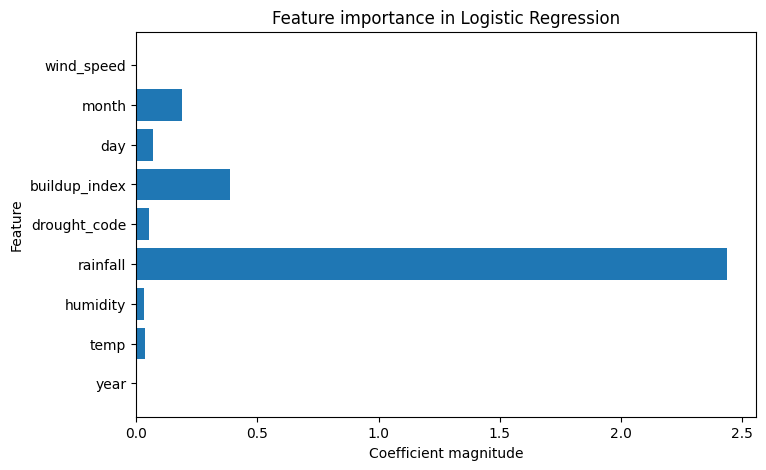

In [23]:
# feature importance

coefficients = logreg_default.coef_[0]  # shape = (n_features,)
plt.figure(figsize=(8,5))
plt.barh(independent_cols, abs(coefficients))  # absolute value for importance
plt.xlabel("Coefficient magnitude")
plt.ylabel("Feature")
plt.title("Feature importance in Logistic Regression")
plt.show()


In [36]:
# hyperparameter tuning
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalties = ['l1', 'l2']  # we’ll restrict to l1/l2 for solver compatibility

results = []

for penalty in penalties:
    solver = 'liblinear' #liblinear compatible with l1, l2 (but not none or elasticnet)
    
    for C in C_values:
        logreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000)
        logreg.fit(X_training, y_training)
        
        train_acc = accuracy_score(y_training, logreg.predict(X_training))
        test_acc = accuracy_score(y_test, logreg.predict(X_test))
        
        results.append((C, penalty, train_acc, test_acc))

results_df = pd.DataFrame(results, columns=["C", "penalty", "Train Accuracy", "Test Accuracy"])
print(results_df)

           C penalty  Train Accuracy  Test Accuracy
0      0.001      l1        0.805195           0.70
1      0.010      l1        0.863636           0.78
2      0.100      l1        0.883117           0.84
3      1.000      l1        0.922078           0.88
4     10.000      l1        0.922078           0.86
5    100.000      l1        0.922078           0.88
6   1000.000      l1        0.928571           0.90
7      0.001      l2        0.863636           0.82
8      0.010      l2        0.883117           0.84
9      0.100      l2        0.896104           0.82
10     1.000      l2        0.909091           0.90
11    10.000      l2        0.922078           0.88
12   100.000      l2        0.928571           0.86
13  1000.000      l2        0.922078           0.86


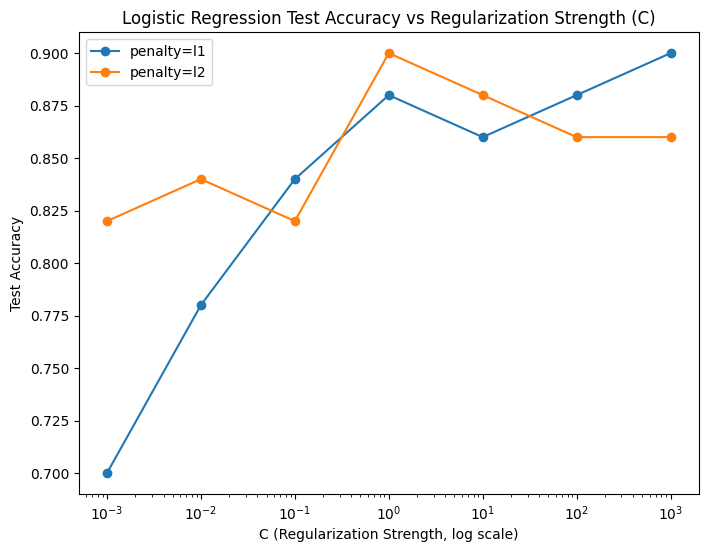

In [22]:
# plot results for logistic regression model
plt.figure(figsize=(8,6))
# each line will be either l1 or l2 penalty
for penalty in penalties:
    subset = results_df[results_df["penalty"] == penalty]
    plt.plot(subset["C"], subset["Test Accuracy"], marker='o', label=f'penalty={penalty}')

plt.xscale('log') #log scale so first few data points aren't on top of each other
plt.title("Logistic Regression Test Accuracy vs Regularization Strength (C)")
plt.xlabel("C (Regularization Strength, log scale)")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()